<a href="https://colab.research.google.com/github/suvasismohanty84/Airline-Dashboard-/blob/main/Descriptive_Statistics_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Diamond.csv to Diamond.csv


In [2]:
import os
print(os.listdir())

['.config', 'Diamond.csv', 'sample_data']


In [3]:
!ls

Diamond.csv  sample_data


In [11]:
import pandas as pd
df=pd.read_csv("Diamond.csv")
print(df.head())

   carat      cut color clarity  depth  table  weight  size  price
0   0.23    Ideal     E     SI2   61.5   55.0    3.95  3.98    326
1   0.21  Premium     E     SI1   59.8   61.0    3.89  3.84    326
2   0.23     Good     E     VS1   56.9   65.0    4.05  4.07    327
3   0.29  Premium     I     VS2   62.4   58.0    4.20  4.23    334
4   0.31     Good     J     SI2   63.3   58.0    4.34  4.35    335


In [12]:
print(df.tail())

       carat        cut color clarity  depth  table  weight  size  price
53935   0.72      Ideal     D     SI1   60.8   57.0    5.75  5.76   2757
53936   0.72       Good     D     SI1   63.1   55.0    5.69  5.75   2757
53937   0.70  Very Good     D     SI1   62.8   60.0    5.66  5.68   2757
53938   0.86    Premium     H     SI2   61.0   58.0    6.15  6.12   2757
53939   0.75      Ideal     D     SI2   62.2   55.0    5.83  5.87   2757


In [20]:
#A.	Create 2 dataframes out of this dataframe – 1 with all numerical variables and other with all categorical variables.#
numerical_df = df.select_dtypes(include=['number'])
categorical_df = df.select_dtypes(exclude=['number'])

In [16]:
print(" The Numerical Variables DataFrame :")
print(numerical_df.head())
print("\n The Categorical Variables DataFrame:")
print(categorical_df.head())

 The Numerical Variables DataFrame :
   carat  depth  table  weight  size  price
0   0.23   61.5   55.0    3.95  3.98    326
1   0.21   59.8   61.0    3.89  3.84    326
2   0.23   56.9   65.0    4.05  4.07    327
3   0.29   62.4   58.0    4.20  4.23    334
4   0.31   63.3   58.0    4.34  4.35    335

 The Categorical Variables DataFrame:
       cut color clarity
0    Ideal     E     SI2
1  Premium     E     SI1
2     Good     E     VS1
3  Premium     I     VS2
4     Good     J     SI2


In [19]:
##Calculate the measure of central tendency of numerical variables using Pandas and statistics libraries and check if the calculated values are different between these 2 libraries.##

In [24]:
print("\nCentral Tendency using Statistics:")
for column in numerical_df.columns:
    print(f"Column: {column}")
    print(f"Mean: {statistics.mean(numerical_df[column])}")
    print(f"Median: {statistics.median(numerical_df[column])}")
    print(f"Mode: {statistics.mode(numerical_df[column])}")



Central Tendency using Statistics:
Column: carat
Mean: 0.7979397478680015
Median: 0.7
Mode: 0.3
Column: depth
Mean: 61.74940489432703
Median: 61.8
Mode: 62.0
Column: table
Mean: 57.45718390804598
Median: 57.0
Mode: 56.0
Column: weight
Mean: 5.731157211716722
Median: 5.7
Mode: 4.37
Column: size
Mean: 5.734525954764553
Median: 5.71
Mode: 4.34
Column: price
Mean: 3932.799721913237
Median: 2401.0
Mode: 605


In [26]:
print("Central Tendency using Pandas:")
for column in numerical_df.columns:
    print(f"Column: {column}")
    print(f"Mean: {numerical_df[column].mean()}")
    print(f"Median: {numerical_df[column].median()}")
    print(f"Mode: {numerical_df[column].mode()[0]}")


Central Tendency using Pandas:
Column: carat
Mean: 0.7979397478680014
Median: 0.7
Mode: 0.3
Column: depth
Mean: 61.749404894327036
Median: 61.8
Mode: 62.0
Column: table
Mean: 57.45718390804598
Median: 57.0
Mode: 56.0
Column: weight
Mean: 5.731157211716722
Median: 5.7
Mode: 4.37
Column: size
Mean: 5.734525954764553
Median: 5.71
Mode: 4.34
Column: price
Mean: 3932.799721913237
Median: 2401.0
Mode: 605


In [27]:
##C.	Check the skewness of all numeric variables. Mention against each variable if its highly skewed/light skewed/ Moderately skwewed.##

In [28]:
print("Skewness of Numerical Variables:")
for column in numerical_df.columns:
    skewness = numerical_df[column].skew()
    print(f"{column}: {skewness}")
    if abs(skewness) > 1:
        print("-> Highly skewed")
    elif abs(skewness) > 0.5:
        print("-> Moderately skewed")
    else:
        print("-> Lightly skewed")

Skewness of Numerical Variables:
carat: 1.116645920812613
-> Highly skewed
depth: -0.08229402630189467
-> Lightly skewed
table: 0.7968958486695427
-> Moderately skewed
weight: 0.3786763426463927
-> Lightly skewed
size: 2.4341667164885554
-> Highly skewed
price: 1.618395283383529
-> Highly skewed


In [29]:
##A.	Use the different transformation techniques to convert skewed data found in previous question into normal distribution.##

In [32]:
import numpy as np
for column in numerical_df.columns:
    skewness = numerical_df[column].skew()
    if abs(skewness) > 0.5:
        print(f"Before transformation, skewness of {column}: {skewness}")
        numerical_df[column] = np.log1p(numerical_df[column])
        print(f"After transformation, skewness of {column}: {numerical_df[column].skew()}")

Before transformation, skewness of carat: 0.5806539131160386
After transformation, skewness of carat: 0.33218986332121647
Before transformation, skewness of table: 0.602231415440025
After transformation, skewness of table: 0.5686774602267733


In [ ]:
##E.	Create a user defined function in python to check the outliers using IQR method. Then pass all numeric variables in that function to check outliers.##

In [33]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [34]:
for column in numerical_df.columns:
    outliers = detect_outliers_iqr(numerical_df[column])
    print(f"{column} - Number of Outliers: {len(outliers)}")

carat - Number of Outliers: 10
depth - Number of Outliers: 2545
table - Number of Outliers: 606
weight - Number of Outliers: 32
size - Number of Outliers: 10
price - Number of Outliers: 0


In [35]:
##F.	Convert categorical variables into numerical variables using LabelEncoder technique.##

In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in categorical_df.columns:
    le = LabelEncoder()
    categorical_df[column] = le.fit_transform(categorical_df[column])
    label_encoders[column] = le
print(categorical_df.head())

   cut  color  clarity
0    2      1        3
1    3      1        2
2    1      1        4
3    3      5        5
4    1      6        3


In [37]:
##G.	Use both the feature scaling techniques (standardscaler/min max scaler) on all the variables.##

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaled_data_standard = scaler.fit_transform(numerical_df)

minmax_scaler = MinMaxScaler()
scaled_data_minmax = minmax_scaler.fit_transform(numerical_df)


standard_scaled_df = pd.DataFrame(scaled_data_standard, columns=numerical_df.columns)
minmax_scaled_df = pd.DataFrame(scaled_data_minmax, columns=numerical_df.columns)

print("Standard Scaled Data:")
print(standard_scaled_df.head())
print("\nMin-Max Scaled Data:")
print(minmax_scaled_df.head())

Standard Scaled Data:
      carat     depth     table    weight      size     price
0 -1.572832 -0.174092 -1.121658 -1.587837 -1.744419 -1.969687
1 -1.661873 -1.360738  1.575246 -1.641325 -1.917064 -1.969687
2 -1.572832 -3.385019  3.205411 -1.498691 -1.635977 -1.966676
3 -1.320846  0.454133  0.267845 -1.364971 -1.447861 -1.945853
4 -1.241490  1.082358  0.267845 -1.240167 -1.310514 -1.942914

Min-Max Scaled Data:
      carat     depth     table    weight      size     price
0  0.024041  0.513889  0.325551  0.367784  0.392269  0.000000
1  0.008135  0.466667  0.458287  0.362197  0.385302  0.000000
2  0.024041  0.386111  0.538520  0.377095  0.396645  0.000753
3  0.069052  0.538889  0.393939  0.391061  0.404237  0.005964
4  0.083228  0.563889  0.393939  0.404097  0.409780  0.006699


In [39]:
##H.	Create the Histogram for all numeric variables and draw the KDE plot on that.##

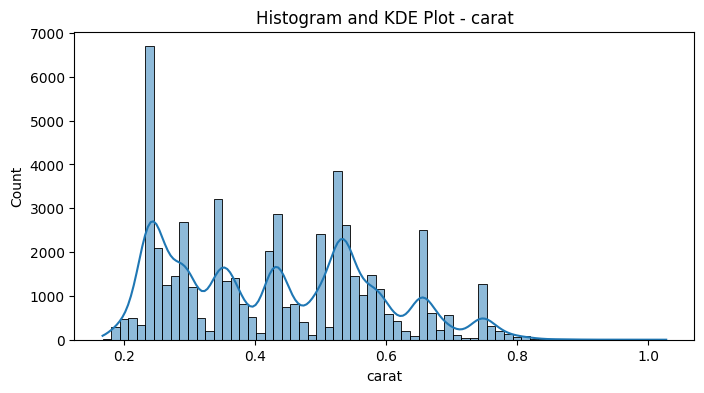

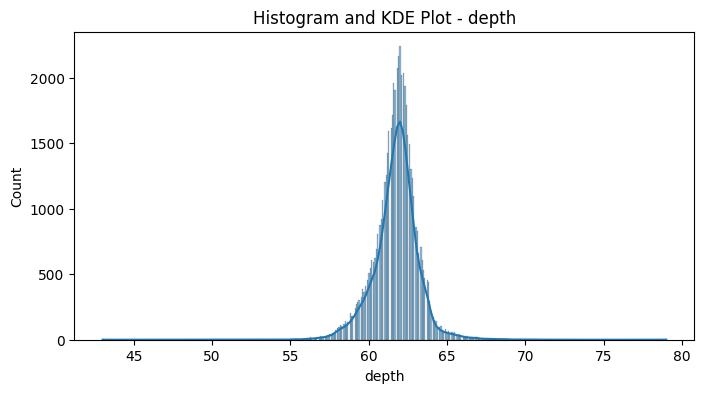

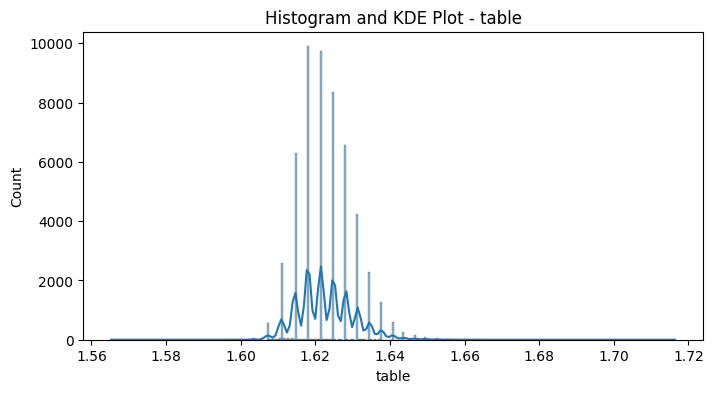

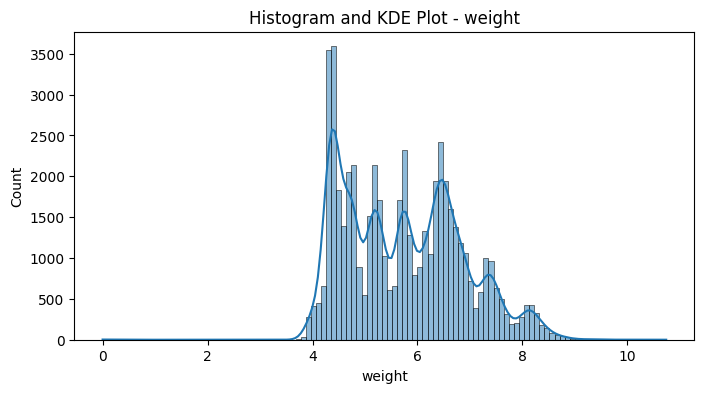

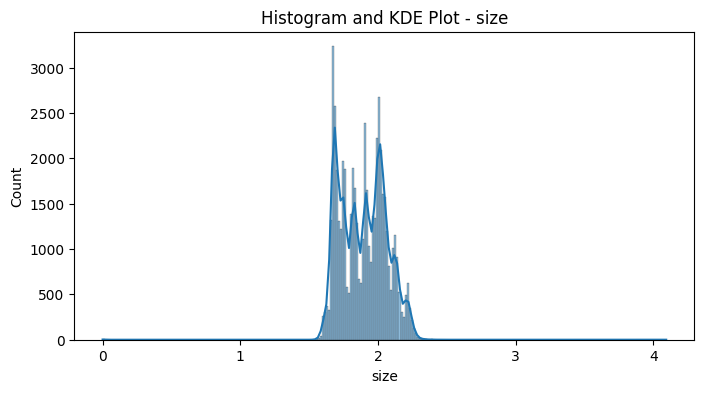

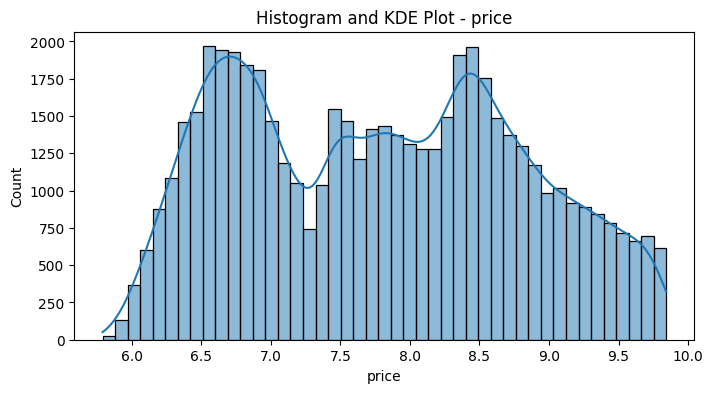

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in numerical_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numerical_df[column], kde=True)
    plt.title(f"Histogram and KDE Plot - {column}")
    plt.show()

In [41]:
##I.	Check the correlation between all the numeric variables using HeatMap and try to draw some conclusion about the data.##

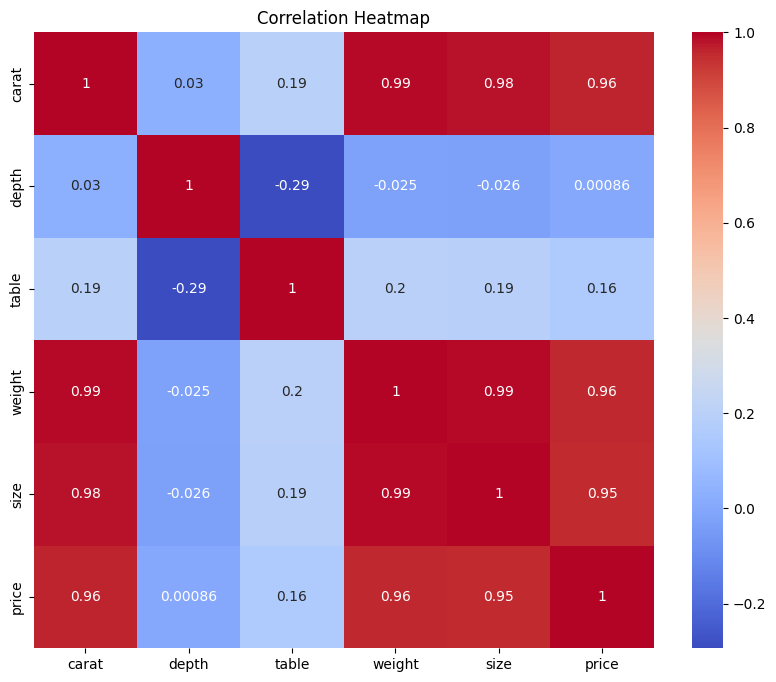

In [43]:
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()